In [85]:
#load in data
from eeg_lib.utils import read_json
import json
import numpy as np

open_eyes = read_json('/Users/rishil/Desktop/FYP/EEG-decoding/eeg_lib/logs/alpha_tests/alpha_tests_open.json')
closed_eyes = read_json('/Users/rishil/Desktop/FYP/EEG-decoding/eeg_lib/logs/alpha_tests/alpha_tests_closed.json')

data = {
        'open_eyes': [],
        'closed_eyes': []
       }

for i in open_eyes['open_eyes']:
    data['open_eyes'].append(np.array(i['eeg_data']))
for i in closed_eyes['open_eyes']: # using key open_eyes because recorded with that session id
    data['closed_eyes'].append(np.array(i['eeg_data']))

print(len(data['open_eyes']))
print(len(data['closed_eyes']))

data['open_eyes'] = data['open_eyes'][1:11]
data['closed_eyes'] = data['closed_eyes'][1:11]

15
18


In [86]:
print(len(data['open_eyes']))
print(len(data['closed_eyes']))

10
10


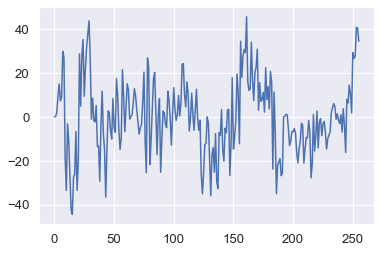

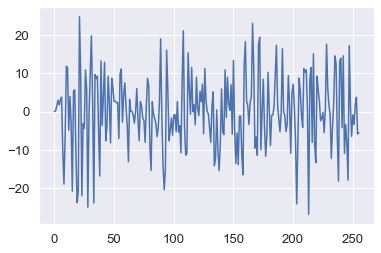

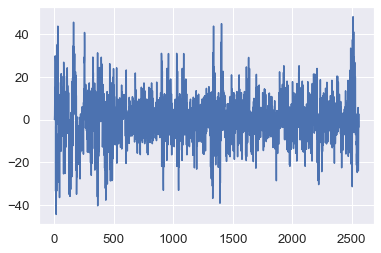

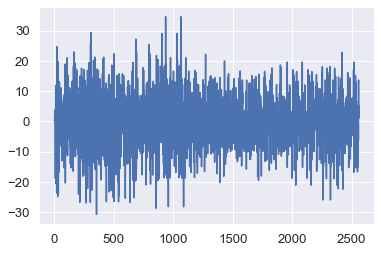

In [88]:
import matplotlib.pylab as plt

plt.figure()
plt.plot(data['open_eyes'][0])

plt.figure()
plt.plot(data['closed_eyes'][0])

open_all = []
for i in range(len(data['open_eyes'])):
    for j in range(len(data['open_eyes'][i])):
        open_all.append(data['open_eyes'][i][j])
closed_all = []
for i in range(len(data['closed_eyes'])):
    for j in range(len(data['closed_eyes'][i])):
        closed_all.append(data['closed_eyes'][i][j])

plt.figure()
plt.plot(open_all)

plt.figure()
plt.plot(closed_all)


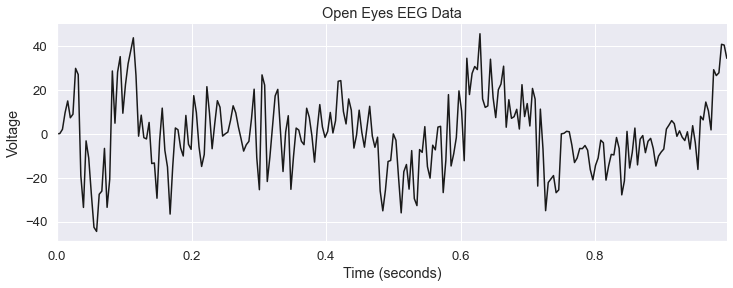

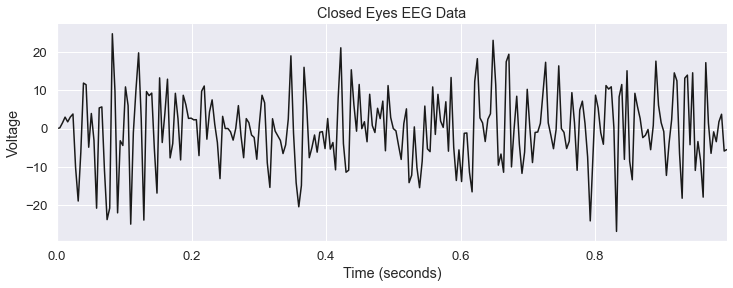

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

# Define sampling frequency and time vector
open_np = np.array(open_all)[0:256]
closed_np = np.array(closed_all)[0:256]

sf = 256
time = np.arange(len(open_np)) / sf

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time, open_np, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.xlim([time.min(), time.max()])
plt.title('Open Eyes EEG Data')
sns.despine()

sf = 256
time = np.arange(len(closed_np)) / sf

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time, closed_np, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.xlim([time.min(), time.max()])
plt.title('Closed Eyes EEG Data')
sns.despine()

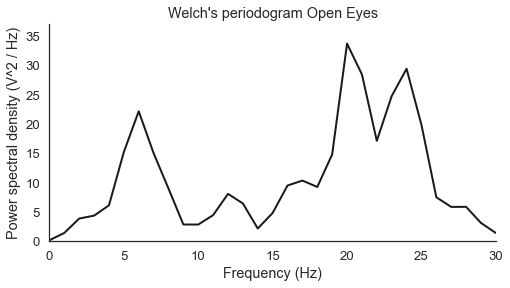

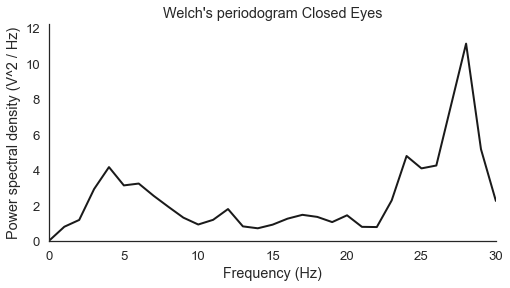

In [52]:
from scipy import signal

# Define window length (4 seconds)
win = 1 * sf
o_freqs, o_psd = signal.welch(open_all, sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(o_freqs, o_psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, o_psd.max() * 1.1])
plt.title("Welch's periodogram Open Eyes")
plt.xlim([0, 30])
sns.despine()

c_freqs, c_psd = signal.welch(closed_all, sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(c_freqs, c_psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, c_psd.max() * 1.1])
plt.title("Welch's periodogram Closed Eyes")
plt.xlim([0, 30])
sns.despine()

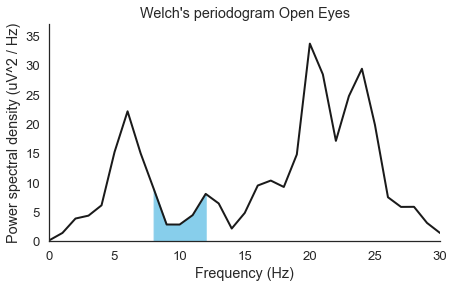

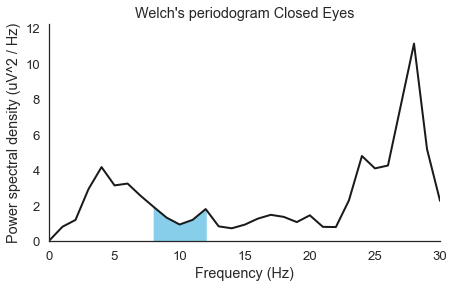

In [53]:
# Define delta lower and upper limits
low, high = 8, 12

# Find intersecting values in frequency vector
idx_delta = np.logical_and(o_freqs >= low, o_freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(o_freqs, o_psd, lw=2, color='k')
plt.fill_between(o_freqs, o_psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 30])
plt.ylim([0, o_psd.max() * 1.1])
plt.title("Welch's periodogram Open Eyes")
sns.despine()

# Find intersecting values in frequency vector
idx_delta = np.logical_and(c_freqs >= low, c_freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(c_freqs, c_psd, lw=2, color='k')
plt.fill_between(c_freqs, c_psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 30])
plt.ylim([0, c_psd.max() * 1.1])
plt.title("Welch's periodogram Closed Eyes")
sns.despine()

In [54]:
from scipy.integrate import simps

# Frequency resolution
o_freq_res = o_freqs[1] - o_freqs[0]  # = 1 / 4 = 0.25

# Compute the absolute power by approximating the area under the curve
o_delta_power = simps(o_psd[idx_delta], dx=o_freq_res)
print('Absolute delta power Open Eyes: %.3f uV^2' % o_delta_power)

# Frequency resolution
c_freq_res = c_freqs[1] - c_freqs[0]  # = 1 / 4 = 0.25

# Compute the absolute power by approximating the area under the curve
c_delta_power = simps(c_psd[idx_delta], dx=c_freq_res)
print('Absolute delta power Closed Eyes: %.3f uV^2' % c_delta_power,'\n')

# Relative delta power (expressed as a percentage of total power)
o_total_power = simps(o_psd, dx=o_freq_res)
o_delta_rel_power = o_delta_power / o_total_power
print('Relative delta power Open Eyes: %.3f' % o_delta_rel_power)

# Relative delta power (expressed as a percentage of total power)
c_total_power = simps(c_psd, dx=c_freq_res)
c_delta_rel_power = c_delta_power / c_total_power
print('Relative delta power Closed Eyes: %.3f' % c_delta_rel_power)

Absolute delta power Open Eyes: 17.383 uV^2
Absolute delta power Closed Eyes: 5.271 uV^2 

Relative delta power Open Eyes: 0.041
Relative delta power Closed Eyes: 0.046


/Users/rishil/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/rishil/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


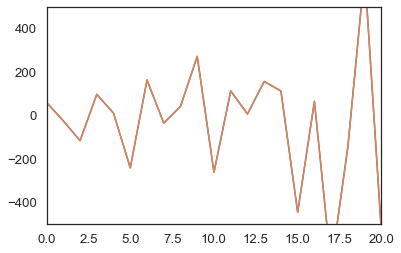

In [55]:

import scipy.fftpack
yf_o = scipy.fftpack.fft(open_all)
plt.xlim([0, 20])
plt.ylim([-500, 500])
plt.plot(yf)

yf_c = scipy.fftpack.fft(closed_all)
plt.xlim([0, 20])
plt.plot(yf)

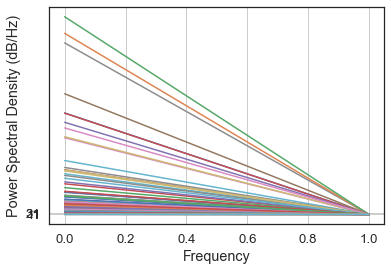

In [56]:
import matplotlib
plt.plot(matplotlib.pyplot.psd(open_all,256))

<ipython-input-57-dd4209cb14a8>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)
<ipython-input-57-dd4209cb14a8>:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(212)


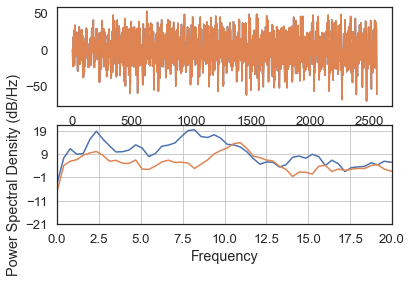

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec
 
# set random state for reproducibility
np.random.seed(19695601)
 
diff = 0.01
ax = np.arange(0, 2560)
n = 2560
by = np.exp(-ax / 0.05)
 
cn = np.convolve(n, by) * diff
cn = cn[:len(ax)]

plt.xlim([0, 20])
plt.subplot(211)
plt.plot(ax, open_all)
plt.subplot(212)
plt.xlim([0, 20])
plt.psd(open_all, 256, 1 / diff)


plt.xlim([0, 20])
plt.subplot(211)
plt.plot(ax, open_all)
plt.subplot(212)
plt.xlim([0, 20])
plt.psd(closed_all, 256, 1 / diff)
 
plt.show()

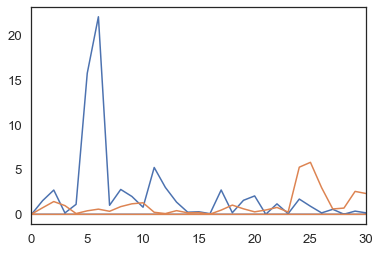

In [72]:
import scipy

f, p = scipy.signal.welch(open_all[0:256], fs=256, nperseg=256,nfft=256,return_onesided=False)

plt.xlim([0, 30])
plt.plot(f,p)

f, p = scipy.signal.welch(closed_all[0:256], fs=256, nperseg=256,nfft=256,return_onesided=False)
plt.plot(f,p)